#Anuj Jagannath Said
#Roll number : ME21b172

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


##Workhorses

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def bipolar_sigmoid(x):
    return 2*sigmoid(x)-1
def linearRangeOfX(a,epsilon):
    l0,r,aplpha=0,1e18,1e-2
    while abs(r-l0)>aplpha :
        mid = (l0+r)/2
        if a*mid-bipolar_sigmoid(a*mid)>epsilon:
            r = mid
        else:
            l0 = mid
    return min(-r,r),max(-r,r)


In [3]:
# Setting Matplotlib plotting defaults
# Font
mpl.rcParams['font.family']           ='Serif'    # Setting Font family
mpl.rcParams['font.size']             = 18        # Setting Font size
# Figure
mpl.rcParams["figure.figsize"]        = (11, 7)   # Setting Figure size
mpl.rcParams['savefig.dpi']           = 300       # Setting plot quality
# Legend
mpl.rcParams["legend.fontsize"]       = 15        # Legend fontsize
mpl.rcParams["legend.title_fontsize"] = 15        # Legend fontsize
# Grid
mpl.rcParams["axes.grid"]             = True      # Setting grid to display
mpl.rcParams["grid.color"]            ='black'    # Setting grid color
mpl.rcParams['grid.linestyle']        ='dotted'   # Setting grid linestyle
mpl.rcParams['grid.linewidth']        = 0.3       # Setting grid linewidth
# xticks
mpl.rcParams["xtick.minor.visible"]   = True      # Setting visibility of xticks
mpl.rcParams['xtick.minor.width']     = 1.0       # Setting width of minor xticks
mpl.rcParams['xtick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['xtick.direction']       ='inout'    # Setting directions of xticks
mpl.rcParams['xtick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['xtick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['xtick.top']             = True      # Setting visibility of top minor xticks
# yticks
mpl.rcParams["ytick.minor.visible"]   = True      # Setting visibility of yticks
mpl.rcParams['ytick.minor.width']     = 1.0       # Setting width of minor yticks
mpl.rcParams['ytick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['ytick.direction']       ='inout'    # Setting directions of yticks
mpl.rcParams['ytick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['ytick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['ytick.right']           = True      # Setting visibility of top minor xticks

##Data Processing

In [4]:
train_split = 0.8
datadf = pd.read_csv('nursery.data')
classifiers = []
datadf.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
#Performing Label encoding
label_encoder = preprocessing.LabelEncoder()
data_df = datadf.apply(label_encoder.fit_transform)
X = np.array(data_df[datadf.columns[:-1]])
y = np.array(data_df[datadf.columns[-1]])
y_train = y[:int(train_split*len(y))]
y_test = y[int(train_split*len(y)):]
X_train_label = X[:int(train_split*len(X))]
X_test_label = X[int(train_split*len(y)):]
#Performing one-hot encoding
one_hot_encoded_df = pd.get_dummies(datadf[datadf.columns[:-1]], columns = datadf.columns[:-1])
X = np.array(one_hot_encoded_df)
X_train_one_hot = X[:int(train_split*len(X))]
X_test_one_hot = X[int(train_split*len(X)):]
#stroring the efficient classifiers
classifiers = []

In [6]:
print(X_train_label.shape)
print(X_train_one_hot.shape)

(10368, 8)
(10368, 27)


##Decision Trees (with labelled encoding)

Depth of decision tree which fits the dataset is 16
Accuracy of Tree 0.9949845679012346


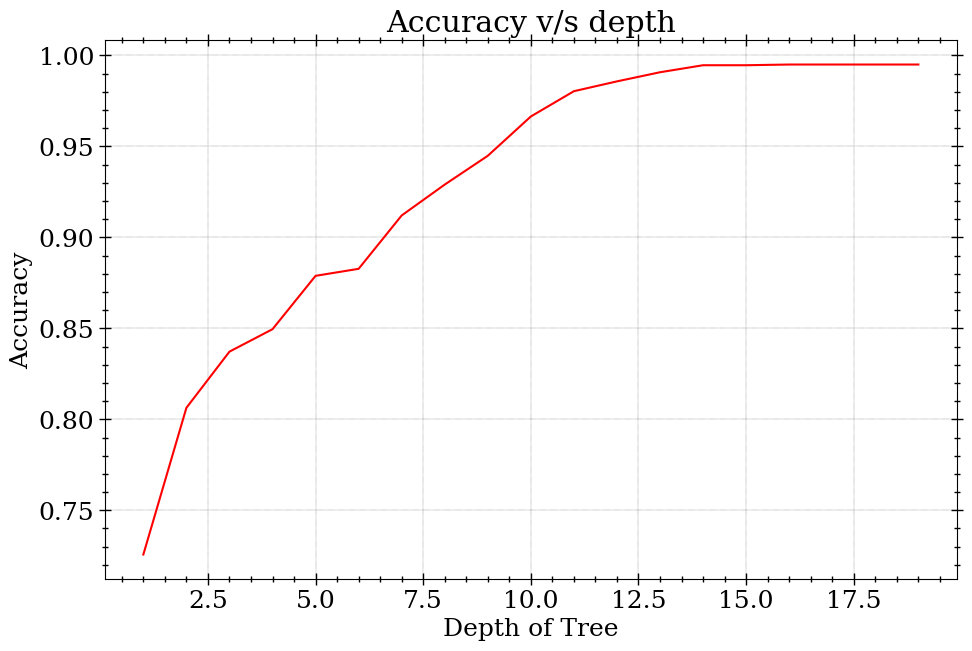

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       834
           1       1.00      0.99      0.99      1047
           2       0.00      0.00      0.00         1
           3       0.99      1.00      0.99       632
           4       0.96      0.99      0.97        78

    accuracy                           0.99      2592
   macro avg       0.79      0.79      0.79      2592
weighted avg       1.00      0.99      0.99      2592



[Text(0.5, 38.02777777777776, 'Predicted Label'),
 Text(98.52777777777777, 0.5, 'True Label')]

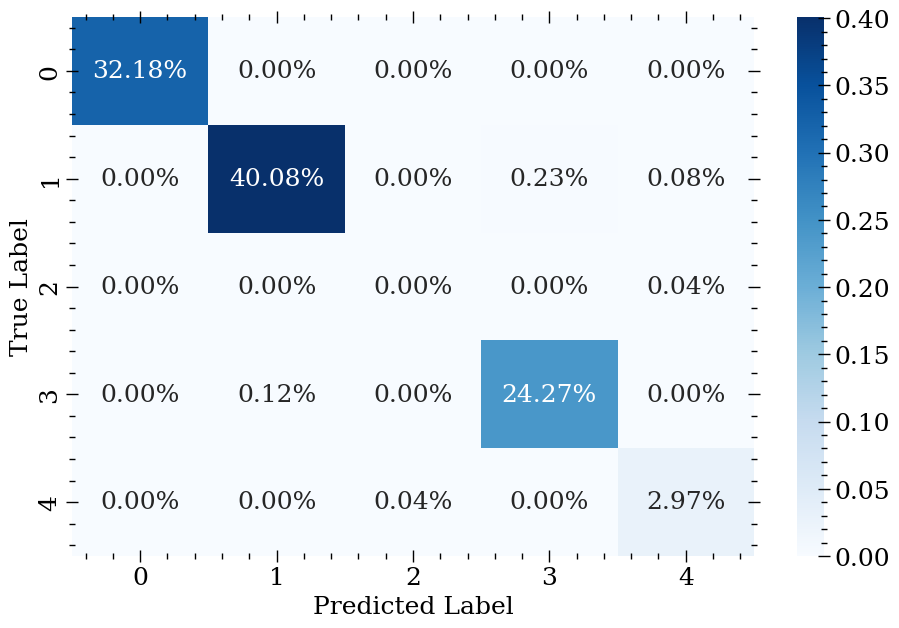

In [7]:
X_train_dc, X_validation_dc, y_train_dc, y_validation_dc = train_test_split(X_train_label,y_train,random_state=104,test_size=0.25,shuffle=True)
accuracy = 0
depth = 1
a = []
for max_depth in range(1,20):
    classifier = DecisionTreeClassifier(random_state=0,max_depth=max_depth)
    classifier = classifier.fit(X_train_dc, y_train_dc)
    y_prediction = classifier.predict(X_validation_dc)
    accuracy_sc = accuracy_score(y_validation_dc,y_prediction)
    if accuracy_sc > accuracy:
        accuracy = accuracy_sc
        depth = max_depth
    a.append(accuracy_sc)
classifier = DecisionTreeClassifier(random_state=0,max_depth=depth)
classifier = classifier.fit(X_train_dc, y_train_dc)
y_prediction = classifier.predict(X_validation_dc)
classifiers.append(classifier)
print('Depth of decision tree which fits the dataset is ' +str(depth))
print('Accuracy of Tree '+str(accuracy))
plt.title('Accuracy v/s depth')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.plot(range(1,20),a,c='red')
plt.show()
cf_matrix = confusion_matrix(y_validation_dc, y_prediction)
print(classification_report(y_validation_dc,y_prediction))
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
s.set(xlabel='Predicted Label', ylabel='True Label')

##Decision Trees (with one-hot encoding)

Depth of decision tree which fits the dataset is 14
Accuracy of Tree 0.9938271604938271


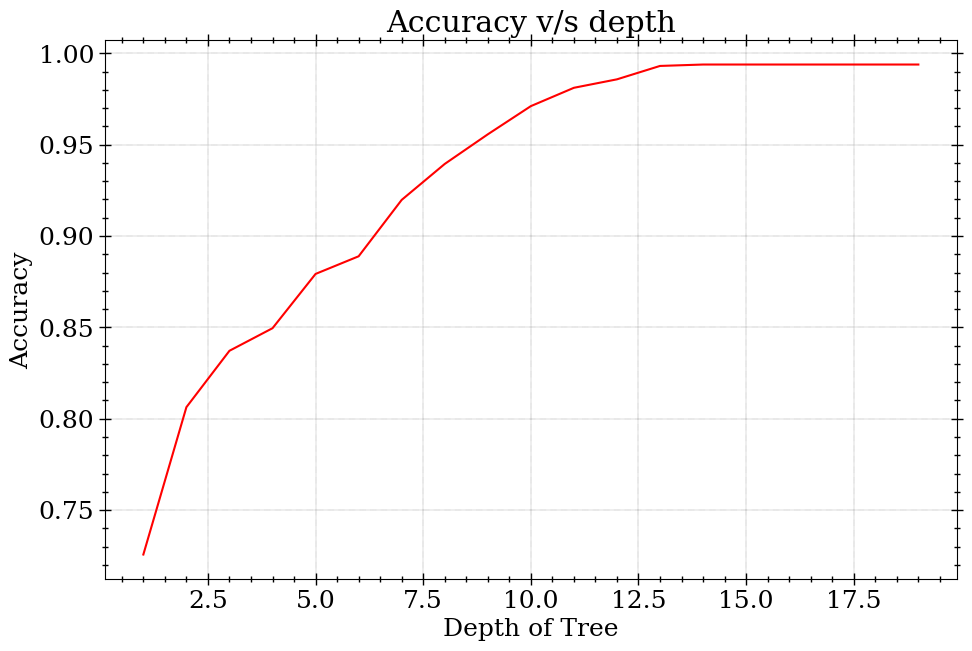

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       834
           1       1.00      0.99      0.99      1047
           2       0.33      1.00      0.50         1
           3       0.99      0.99      0.99       632
           4       0.97      0.97      0.97        78

    accuracy                           0.99      2592
   macro avg       0.86      0.99      0.89      2592
weighted avg       0.99      0.99      0.99      2592



[Text(0.5, 38.02777777777776, 'Predicted Label'),
 Text(98.52777777777777, 0.5, 'True Label')]

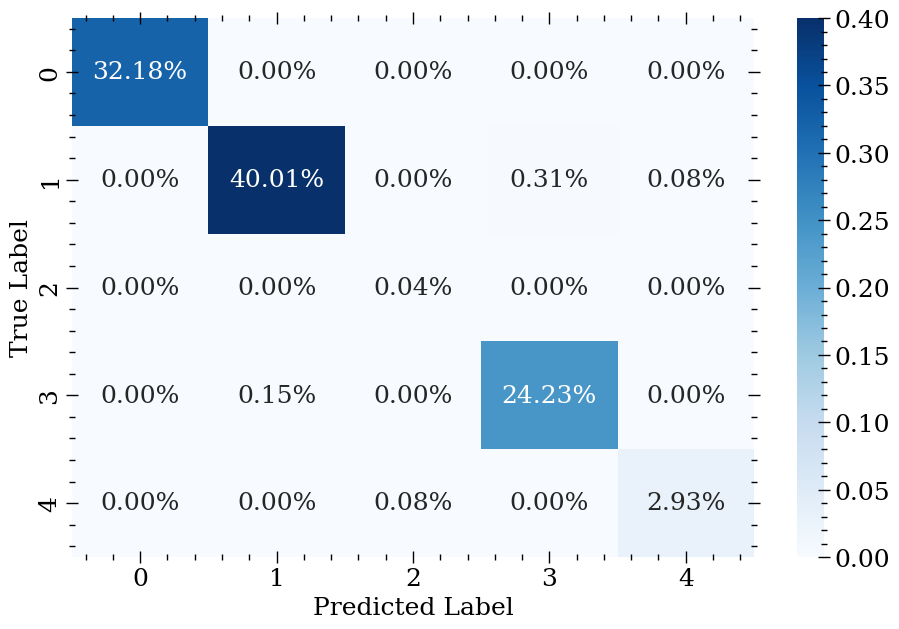

In [8]:
X_train_dc, X_validation_dc, y_train_dc, y_validation_dc = train_test_split(X_train_one_hot,y_train,random_state=104,test_size=0.25,shuffle=True)
accuracy = 0
depth = 1
a = []
for max_depth in range(1,20):
    classifier = DecisionTreeClassifier(random_state=0,max_depth=max_depth)
    classifier = classifier.fit(X_train_dc, y_train_dc)
    y_prediction = classifier.predict(X_validation_dc)
    accuracy_sc = accuracy_score(y_validation_dc,y_prediction)
    if accuracy_sc > accuracy:
        accuracy = accuracy_sc
        depth = max_depth
    a.append(accuracy_sc)
classifier = DecisionTreeClassifier(random_state=0,max_depth=depth)
classifier = classifier.fit(X_train_dc, y_train_dc)
y_prediction = classifier.predict(X_validation_dc)
classifiers.append(classifier)
print('Depth of decision tree which fits the dataset is ' +str(depth))
print('Accuracy of Tree '+str(accuracy))
plt.title('Accuracy v/s depth')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.plot(range(1,20),a,c='red')
plt.show()
cf_matrix = confusion_matrix(y_validation_dc, y_prediction)
print(classification_report(y_validation_dc,y_prediction))
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
s.set(xlabel='Predicted Label', ylabel='True Label')

##Logistic Regression with L1 regularisation

c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

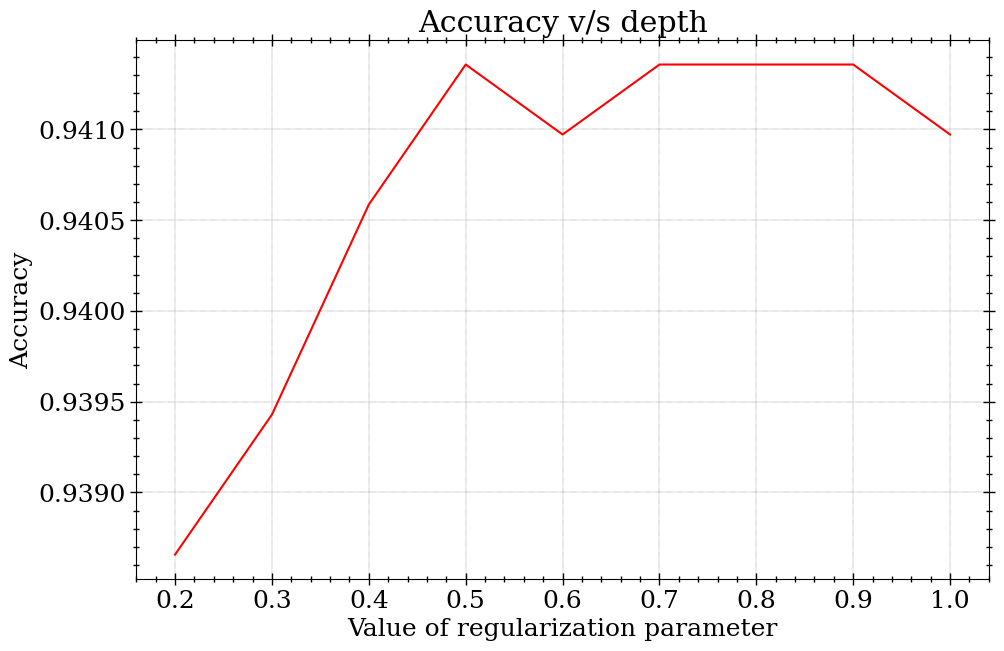

Value of regularization parameter is 0.5000000000000001
Accuracy of Tree 0.941358024691358
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       834
           1       0.91      0.95      0.93      1047
           2       0.00      0.00      0.00         1
           3       0.92      0.89      0.90       632
           4       0.90      0.68      0.77        78

    accuracy                           0.94      2592
   macro avg       0.75      0.70      0.72      2592
weighted avg       0.94      0.94      0.94      2592



c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[Text(0.5, 38.02777777777776, 'Predicted Label'),
 Text(98.52777777777777, 0.5, 'True Label')]

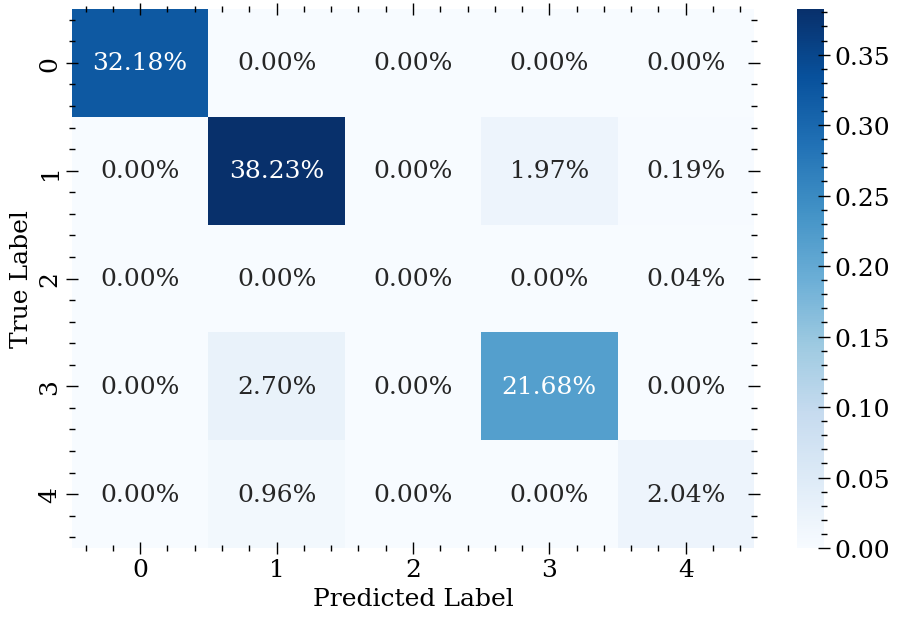

In [9]:
X_train_LR, X_validation_LR, y_train_LR, y_validation_LR = train_test_split(X_train_one_hot,y_train,random_state=104,test_size=0.25,shuffle=True)
accuracy = 0
c_opt = 0.1
a = []
C = np.arange(0.2,1.1,.1)
for c in C:
    classifier = LogisticRegression(random_state=0,penalty='l1',tol=0.00001,C=c,solver='saga')
    classifier = classifier.fit(X_train_LR,y_train_LR)
    y_prediction = classifier.predict(X_validation_LR)
    accuracy_sc = accuracy_score(y_validation_LR,y_prediction)
    if accuracy_sc > accuracy:
        accuracy = accuracy_sc
        c_opt = c
    a.append(accuracy_sc)
classifier = LogisticRegression(random_state=0,penalty='l1',tol=0.00001,C=c_opt,solver='saga')
classifier = classifier.fit(X_train_LR,y_train_LR)
y_prediction = classifier.predict(X_validation_LR)
classifiers.append(classifier)
plt.title('Accuracy v/s depth')
plt.xlabel('Value of regularization parameter')
plt.ylabel('Accuracy')
plt.plot(C,a,c='red')
plt.show()
print('Value of regularization parameter is ' +str(c_opt))
print('Accuracy of Tree '+str(accuracy))
cf_matrix = confusion_matrix(y_validation_LR, y_prediction)
print(classification_report(y_validation_LR,y_prediction))
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
s.set(xlabel='Predicted Label', ylabel='True Label')


##KNN

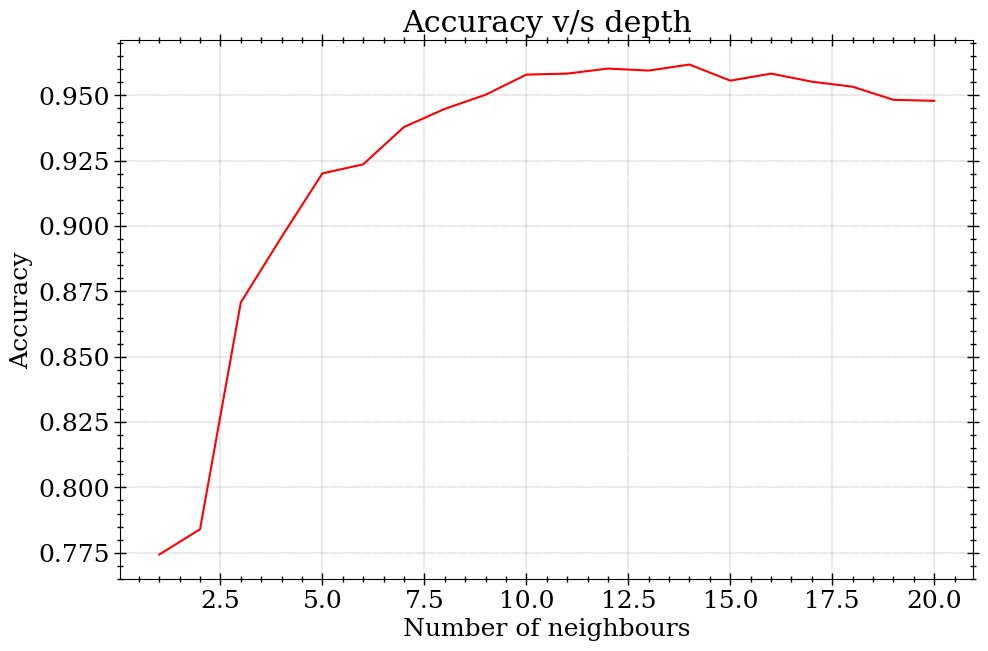

Value of neighbours is 14
Accuracy 0.9618055555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       834
           1       0.93      0.98      0.95      1047
           2       0.00      0.00      0.00         1
           3       0.97      0.94      0.95       632
           4       0.97      0.50      0.66        78

    accuracy                           0.96      2592
   macro avg       0.77      0.68      0.71      2592
weighted avg       0.96      0.96      0.96      2592



c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[Text(0.5, 38.02777777777776, 'Predicted Label'),
 Text(98.52777777777777, 0.5, 'True Label')]

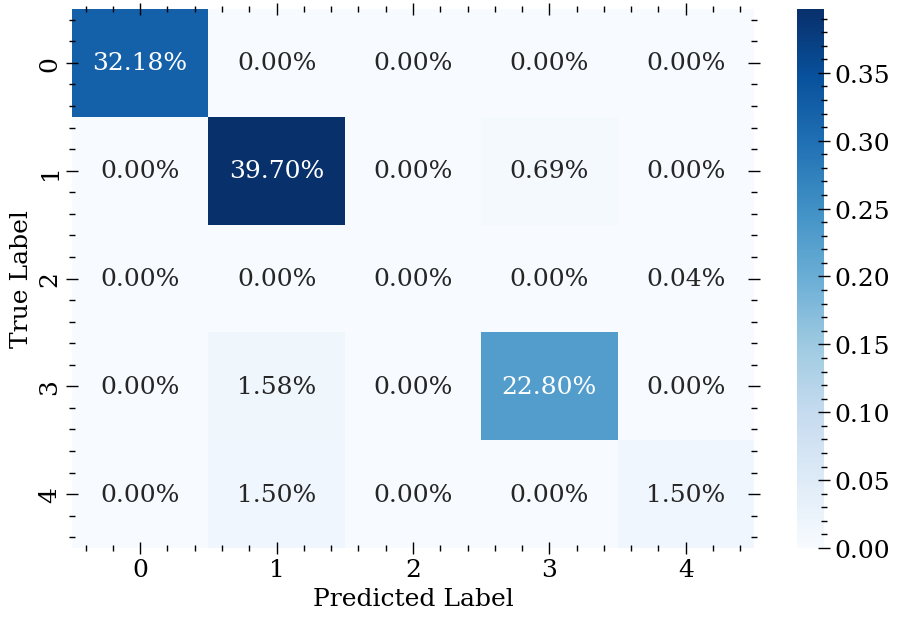

In [10]:
X_train_KNN, X_validation_KNN, y_train_KNN, y_validation_KNN = train_test_split(X_train_one_hot,y_train,random_state=104,test_size=0.25,shuffle=True)
accuracy = 0
neighbours = 1
a = []
N = np.arange(1,21,1)
for neighbour in N:
    classifier = KNeighborsClassifier(n_neighbors=neighbour)
    classifier =  classifier.fit(X_train_KNN,y_train_KNN)
    y_prediction = classifier.predict(X_validation_KNN)
    accuracy_sc = accuracy_score(y_validation_KNN,y_prediction)
    if accuracy_sc > accuracy:
        accuracy = accuracy_sc
        neighbours = neighbour
    a.append(accuracy_sc)
classifier = KNeighborsClassifier(n_neighbors=neighbours)
classifier = classifier.fit(X_train_KNN,y_train_KNN)
classifiers.append(classifier)
y_prediction = classifier.predict(X_validation_KNN)
plt.title('Accuracy v/s depth')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.plot(N,a,c='red')
plt.show()
print('Value of neighbours is ' +str(neighbours))
print('Accuracy '+str(accuracy))
cf_matrix = confusion_matrix(y_validation_KNN, y_prediction)
print(classification_report(y_validation_KNN,y_prediction))
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
s.set(xlabel='Predicted Label', ylabel='True Label')


##Variance-Mean calcuation for all above model estimators

c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

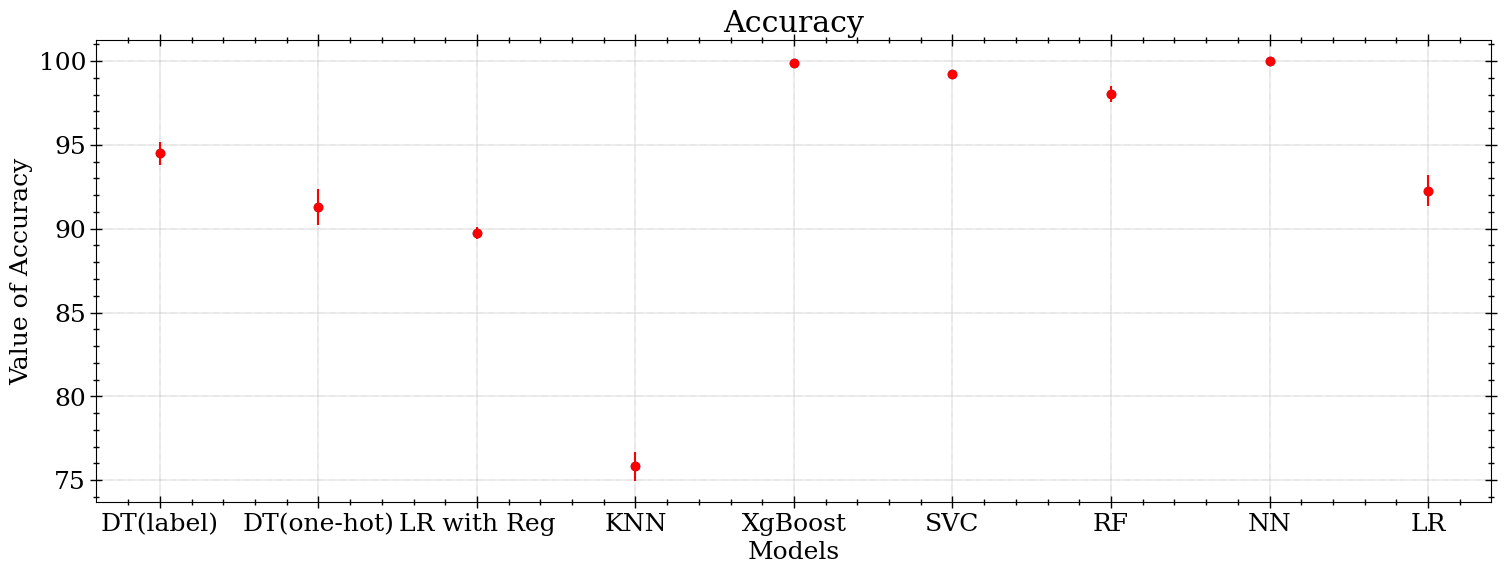

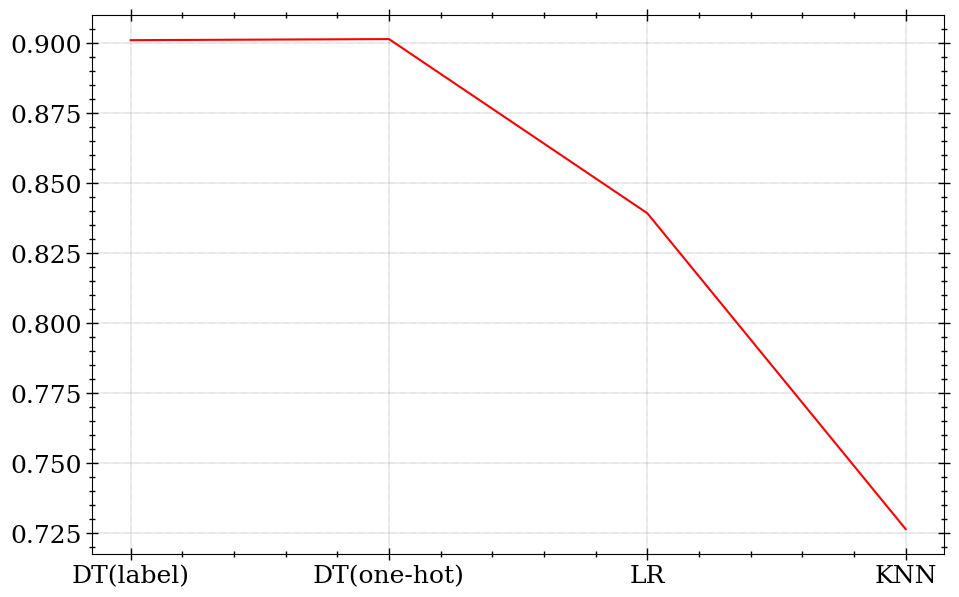

In [11]:
mean = []
variance =[]
test_accuracy = []
k_folds = KFold(n_splits = 10)
scores = cross_val_score(classifiers[0], X_train_label, y_train, cv = k_folds)
mean.append(np.mean(scores)*100)
variance.append(np.var(scores)*100)
test_accuracy.append(accuracy_score(y_test,classifiers[0].predict(X_test_label)))
for i in range(1,4):
    test_accuracy.append(accuracy_score(y_test,classifiers[i].predict(X_test_one_hot)))
    scores = cross_val_score(classifiers[i], X_train_one_hot, y_train, cv = k_folds)
    mean.append(np.mean(scores)*100)
    variance.append(np.var(scores)*100)
plt.figure(figsize=(18,6))
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Value of Accuracy')
models = ['DT(label)','DT(one-hot)','LR with Reg','KNN','XgBoost','SVC','RF','NN','LR']
# mean = mean*100
# variance = variance*10000
mean = np.append(mean,[99.907,99.198,98.025,100,92.253])
variance = np.append(variance,[.031,.277,.463,0,.926])
plt.scatter(models, mean)
plt.errorbar(models, mean, yerr=variance, fmt='o', color='red')
plt.show()
plt.plot(['DT(label)','DT(one-hot)','LR','KNN'],test_accuracy,c='red')
plt.show()

As expected from the above plots KNN performs worst while decison trees perform best. <br>
Similarly one can notice from the accuracy v/s model plot, after performing 10-fold cross validation, Decsion Trees (also Logistic Regression on the boder) have accuracy above 90%.

##Task 2

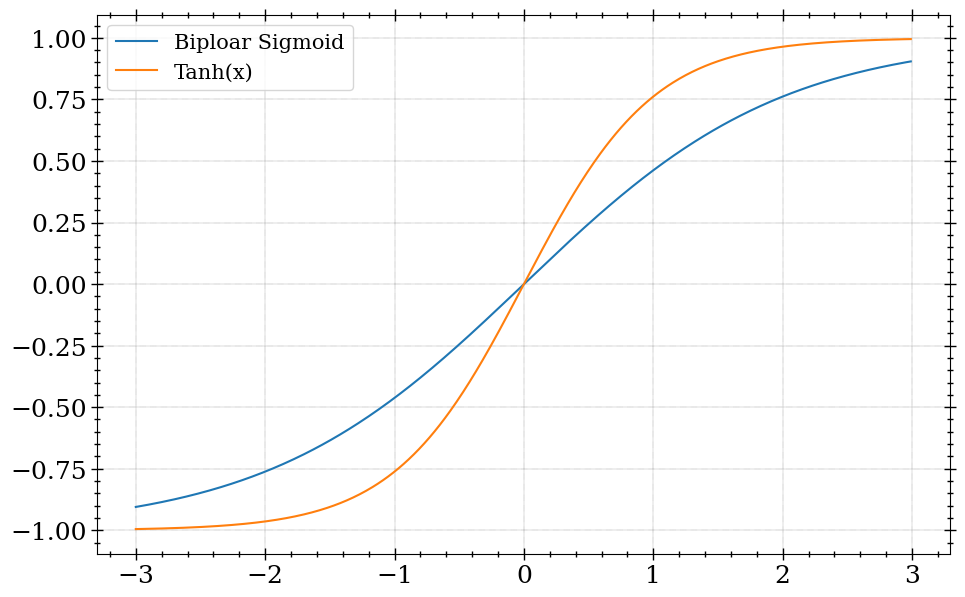

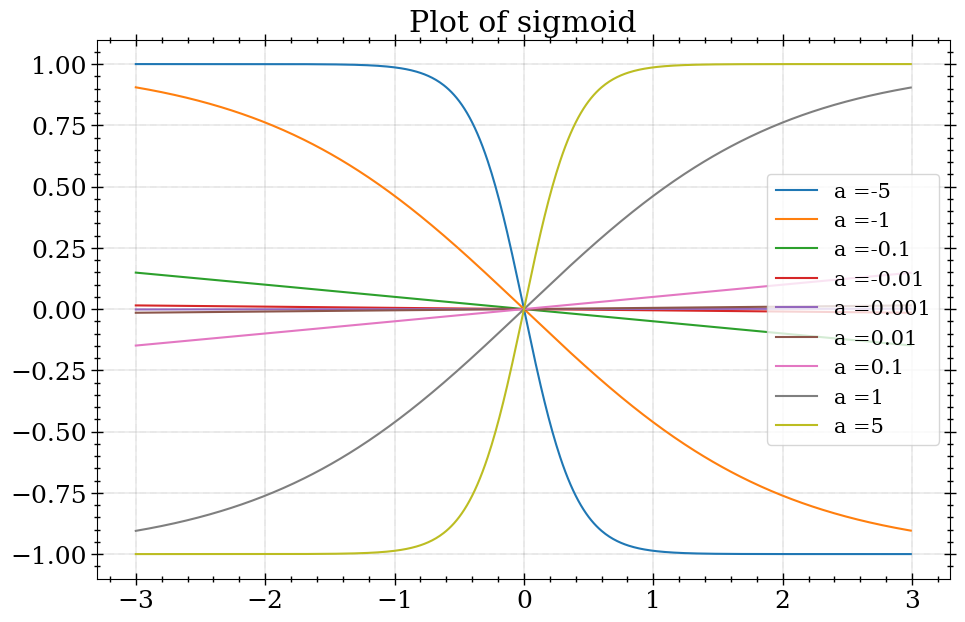

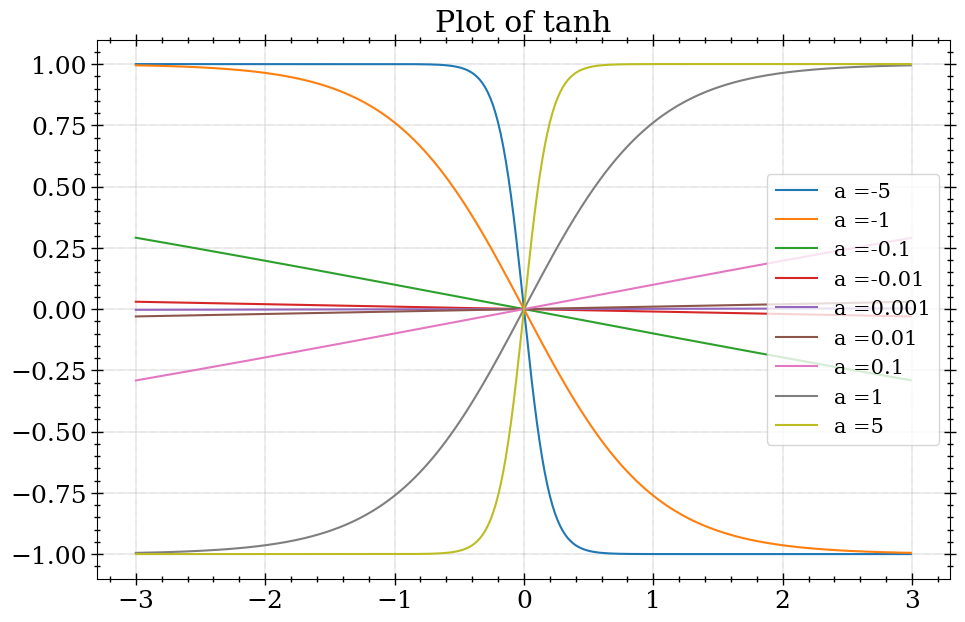

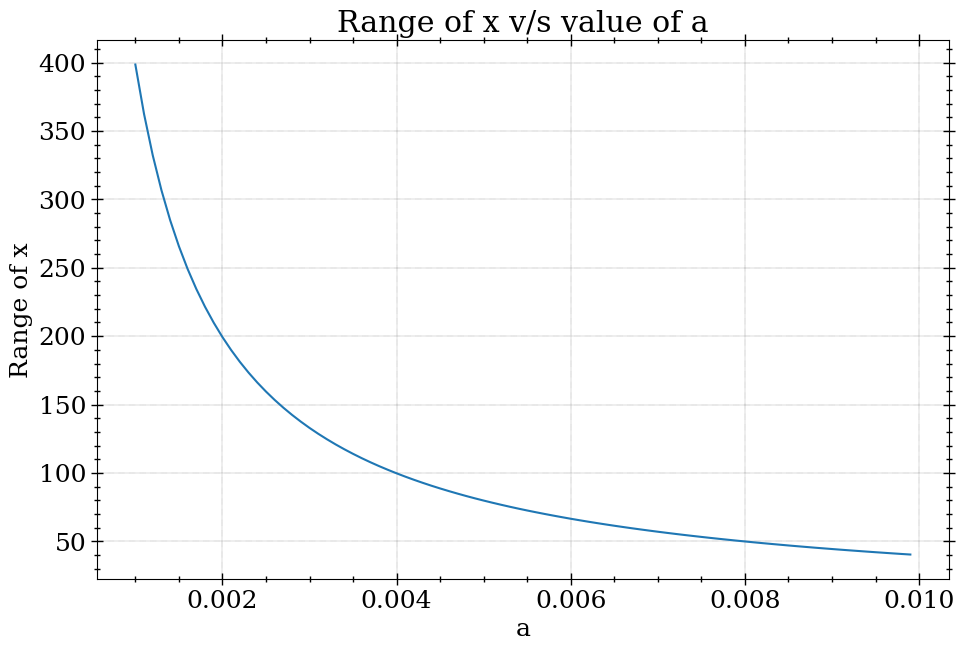

In [12]:
accepted_threshold_for_linear_asumption = 0.1
x = np.arange(-3,3,.01)
bipolar_func = bipolar_sigmoid(x)
tanh_x = np.tanh(x)
plt.plot(x,bipolar_func,label='Biploar Sigmoid')
plt.plot(x,tanh_x,label='Tanh(x)')
plt.legend()
plt.show()
A = [-5, -1, -.1, -.01, .001, .01, .1, 1, 5]
plt.title('Plot of sigmoid')
for a in A:
    plt.plot(x,bipolar_sigmoid(a*x),label='a ='+str(a))
plt.legend()
plt.show()
plt.title('Plot of tanh')
for a in A:
    plt.plot(x,np.tanh(a*x),label='a ='+str(a))
plt.legend()
plt.show()
A = np.arange(0.001,0.01,0.0001)
x_range = []
plt.title('Range of x v/s value of a')
plt.xlabel('a')
plt.ylabel('Range of x')
for a in A:
    a,b=linearRangeOfX(a,accepted_threshold_for_linear_asumption)
    x_range.append(b-a)
plt.plot(A,x_range)
plt.show()